In [10]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import torchvision as tv
import pandas as pd
import pickle

In [11]:
#скопировать файл model.py в основную папку колаб
from model import Model

#Обучение модели LeNet
Обучение модели выполнено на основе модуля, выложенного на Git
https://github.com/ChawDoe/LeNet5-MNIST-PyTorch

В исходном файле train.py были изменены:    
1. пути к train и test датасетам   
root='/content/LeNet-5-MNIST-PyTorch/train'   
root='/content/LeNet-5-MNIST-PyTorch/test'
2. запись обученной модели в файл - оставила только самую последюю модель и именила функцию записи, т.к. на исходный порядок записи колаб ругался, а потом не хотел загружать модель.  
3. Файл был переименован в train_mine.py

Нужно затем перезаписать этот файл в корневой папке колаб.

Копирую датасет для обучения модели в текущую папку колаба

In [ ]:
%%shell

git clone https://github.com/ChawDoe/LeNet-5-MNIST-PyTorch.git



Cloning into 'LeNet-5-MNIST-PyTorch'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 89 (delta 37), reused 73 (delta 28), pack-reused 2 (from 1)
Receiving objects: 100% (89/89), 11.03 MiB | 18.64 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [ ]:
#переходим в дирректорию LeNet5-MNIST-PyTorch
#!cd /content/LeNet-5-MNIST-PyTorch
#!ls

LeNet-5-MNIST-PyTorch  sample_data


Специально выбрала вариант использования готовых скриптов, а не писала его сама чтобы потренироваться в применении готовых модулей.    
Запускаю измененный файл обучения модели

In [ ]:
!python /content/LeNet-5-MNIST-PyTorch/train_mine.py

accuracy: 0.682
accuracy: 0.810
accuracy: 0.953
accuracy: 0.966
accuracy: 0.973
accuracy: 0.978
accuracy: 0.980
accuracy: 0.982
accuracy: 0.983
accuracy: 0.984
accuracy: 0.984
accuracy: 0.985
accuracy: 0.985
accuracy: 0.985
accuracy: 0.985
accuracy: 0.984
accuracy: 0.985
accuracy: 0.985
Model finished training


Чтобы в дальнейшем не запускать каждый раз модель на обучение сохранила файл с весами модели с лучшим значением accuracy.     
Дальше его загружала и обучала шум.

In [ ]:
# на всякий случай - для удаления лишних папок
#!rm -rf LeNet-5-MNIST-PyTorch

#Загрузка датасета для предсказания и обучения шума

In [ ]:
batch_size = 10 #чтобы можно было выбирать разные картинки для их зашумления

In [12]:
train_dataset = tv.datasets.MNIST('.', train = True, transform = tv.transforms.ToTensor(), download = True)
test_dataset = tv.datasets.MNIST('.', train = False, transform = tv.transforms.ToTensor(), download = True)
train = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size)
test = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size)

In [ ]:
""" вариант обращения к объектам dataloaderа
dataiter = iter(test)
images, labels = next(dataiter)
print(images.shape)
print(labels.shape)

torch.Size([10, 1, 28, 28])
torch.Size([10])


истинная цифра - 9


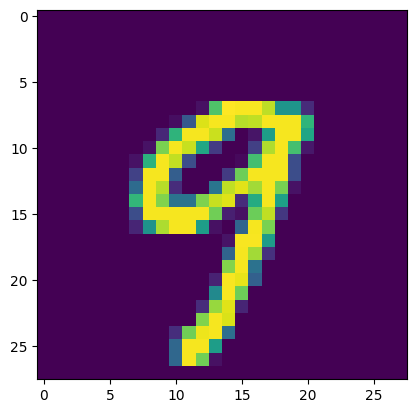

In [13]:
#Посмотреть что внутри
c = 0 #счетчик
num_img = 5 #номер картинки, которую хотим посмотреть
for X0, y0 in train:
  c += 1
  if c == num_img:
    X = torch.unsqueeze(X0[c], dim = 0) #сохраняем текущее изображение и добавляем измерение батча для модели
    y = torch.unsqueeze(y0[c], dim = 0)
    plt.imshow(X[0,0,...])
    print(f'истинная цифра - {y[0]}')
    break

In [ ]:
#посмотреть размерности данных
X.shape

torch.Size([1, 1, 28, 28])

In [ ]:
y.shape

torch.Size([1])

In [ ]:
X0.shape

torch.Size([10, 1, 28, 28])

In [ ]:
y0.shape

torch.Size([10])

#Предсказание

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' #колаб не всегда позволят подключиться к cuda
device

'cpu'

In [15]:
#инициализируем модель той же архитектуры как и обученная (из того же модуля)
model = Model().to(device)

In [16]:
#загружаем сохраненные данные (состояния) обученной модели
#state_model = torch.load('/content/mnist_0.985.pth', weights_only=True)
#state_model = torch.load('/content/mnist_0.985.pth', weights_only=True) #если cuda в колаб доступна
state_model = torch.load('/content/mnist_0.985.pth', weights_only=True, map_location=torch.device('cpu')) #если cuda в колаб недоступна

In [17]:
#передача загруженных состояний модели
model.load_state_dict(state_model)

<All keys matched successfully>

In [18]:
predict = model(X.to(device)) #предсказание класса для выбранной картинки

In [19]:
predict #посмотреть что получилось

tensor([[ 0.0000,  0.0000,  0.0000,  3.5898,  4.4370,  0.0811,  0.0000,  6.1429,
          4.2130, 20.1904]], grad_fn=<ReluBackward0>)

In [20]:
predict = torch.argmax(predict.detach(), dim = -1)
predict.item()

9

#Тестовая генерация шума, посмотреть как складывается с картинкой

In [ ]:
mu =0 #среднее
sigma = 0.1 #станд. отклонение

In [ ]:
noise = np.random.normal(loc = mu, scale = sigma, size = X[0,0,...].shape)

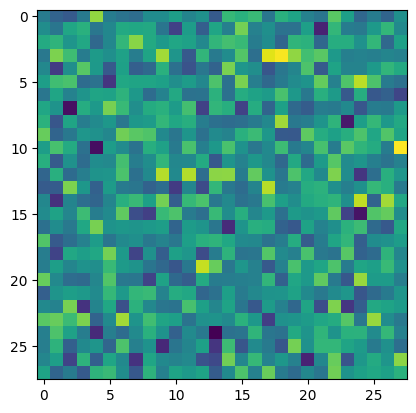

In [ ]:
plt.imshow(noise)

In [ ]:
X_noise = X + torch.from_numpy(noise)

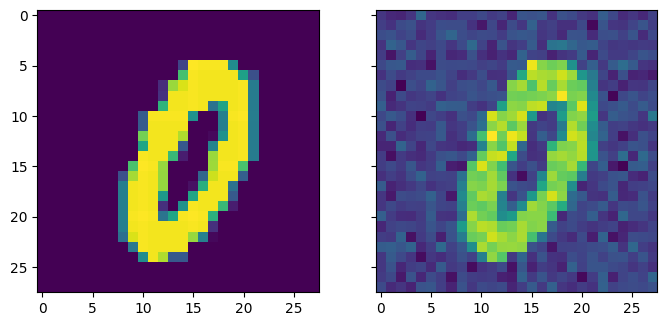

In [ ]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(X[0,0,...])
ax[1].imshow(X_noise[0,0,...])
plt.show()

#Обучение шума

In [21]:
n=200 #количество итераций изменения шума

In [22]:
model.eval() #переводим модель в режим предсказания (не меняем градиенты, веса и т.д.)

Model(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (relu4): ReLU()
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (relu5): ReLU()
)

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Истинный класс - 9.0, Предсказанный класс - 7
итерация - 132
loss - 115.760, класс - 7, mu - 1.093, sigma - -0.267
Слева ИСХОДНОЕ изображение, справа ЗАШУМЛЕННОЕ изображение


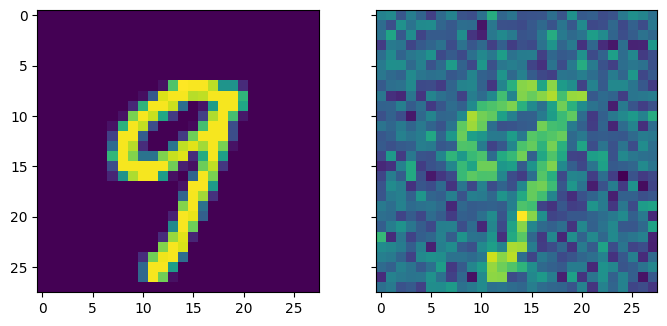

In [23]:
#начальное значение среднего и станд. отклон шума, указываем, что нужно сохранять градиенты, указываем куда перенести (cuda/cpu)
mu = torch.tensor([0.0], requires_grad=True, device = device)
sigma = torch.tensor([0.0], requires_grad=True, device = device)

#Для входых данных указываем нужный тип данных и тип устройства
X = X.type(torch.float32).to(device)
y = y.type(torch.float32).to(device)

optimizer = torch.optim.Adam(params=[mu, sigma], lr=0.01)
loss_func = torch.nn.MSELoss() #среднеквадр ошибка

for i in range(n):
  noise = (mu + sigma * torch.randn_like(X[0,0,...])).to(device) #гененрируем шум
  X_noise = X + noise #прибавляем шум к исходному изображению

  optimizer.zero_grad() #обнуляем градиенты

  pred_y = model(X_noise) #получаем предсказание от зашумленного изображения

  loss = loss_func(-pred_y, y) #считаем разницу между предсказанным классом c "-" (антиградиент) и фактическим

  loss.backward() #вычисление градиентов

  optimizer.step() #шаг оптимизатора

  pred_class = torch.argmax(pred_y.detach(), dim = -1)

  #если уже не верный класс, то останавливаемся
  if torch.argmax(pred_y.detach(), dim = -1) != y:
    print(f'Истинный класс - {y.item()}, Предсказанный класс - {pred_class.item()}')
    break

print(f'итерация - {i}')
print('loss - {:.3f}, класс - {:.0f}, mu - {:.3f}, sigma - {:.3f}'.format(loss.item(), pred_class.item(), mu.item(), sigma.item()))
print('Слева ИСХОДНОЕ изображение, справа ЗАШУМЛЕННОЕ изображение')

fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(X[0,0,...].cpu().detach().numpy())
ax[1].imshow(X_noise[0,0,...].cpu().detach().numpy())
plt.show()


